---

# Generate datasets

In [2]:
# import libraries we need
%pylab inline
import tensorflow as tf
from tensorflow import keras
import tensorflow_probability as tfp
tfd = tfp.distributions

import sys
sys.path.append('./../py_programs/')
from Simulator import *
from keract import get_activations


Populating the interactive namespace from numpy and matplotlib


### Generate data files with two fixed mixed sources,  **saved in `Old_data`**

<Figure size 432x288 with 0 Axes>

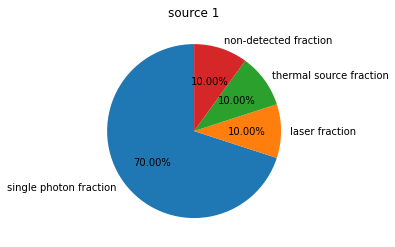

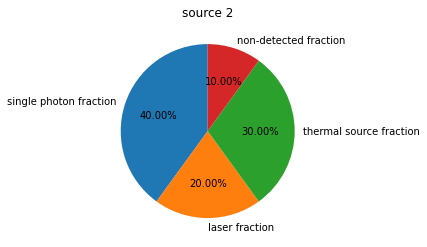

In [2]:
# create two mixed sources and corresponding two distributions
s1 = simulator(Nbins=200, Ndet=1e6, nset=100, sps=0.7, laser=0.1, ther=0.1, non=0.1)
s2 = simulator(Nbins=200, Ndet=1e6, nset=100, sps=0.4, laser=0.2, ther=0.3, non=0.1)

# plot their piecharts to see source fractions
plt.figure(1)
s1.piechart()
plt.title('source 1')
plt.figure(2)
s2.piechart()
plt.title('source 2')
plt.show()


---
---
### generate data with random distributions

In [ ]:
# define parameters
types = 50
basic = 4
rand = np.random.randint(low=0,high=100,size=(types,basic))
data = []
sets = 100


# generate data
for i in range(types):
    randsource = simulator(Nbins=200, Ndet=1e6, nset=sets,sps=rand[i,0], laser=rand[i,1], ther=rand[i,2], non=rand[i,3])
    datas = randsource.get_data(save=True, name='./../simulation/data/rand'+str(i))
    data.append(datas)
    
data = np.array(data)

In [ ]:
# convert simulated data into correct shape
x_ = data.reshape(data.shape[0]*data.shape[1],data.shape[2],data.shape[3])

# get the ground truth
threshold = 0.5
y_ = get_truth(x_, thr=threshold)

# we only need the binvalues for training
x_ = x_[:,2,:]

# generate pure sps and pure laser

In [ ]:
# define parameters
data = []
sets = 5000

# create distributions
sps = simulator(Nbins=200, Ndet=1e6, nset=sets,sps=1., laser=0., ther=0, non=0)
laser = simulator(Nbins=200, Ndet=1e6, nset=sets,sps=0., laser=1., ther=0, non=0)

# get data files
sps_ = sps.get_data(save=True, name='./../simulation/data/sps')
laser_ = laser.get_data(save=True, name='./../simulation/data/laser')



In [15]:
# convert simulated data into correct shape
x_ = np.concatenate([sps_,laser_])

# get the ground truth
threshold = 0.5
y_ = get_truth(x_, thr=threshold)

# we only need the g2signal for training
x_ = x_[:,2,:]

# generate half-half random distribution
Idealy, we want to train the model with equal number of data sets for each class. Due to the nature of light sources, simple using random distribution is not able to generate above results. So we the range of random function is limited to make sure we have half-half chances in the end.

In [4]:
# define parameters, 100 types of sources, each contains 100 data sets
types = 100
data = []
sets = 100
rsps = np.random.randint(low=0,high=450,size=types)
rlaser = np.random.randint(low=0,high=100,size=types)
rther = np.random.randint(low=0,high=100,size=types)
rnon = np.random.randint(low=0,high=100,size=types)

# generate data
for i in range(types):
    randsource = simulator(Nbins=200, Ndet=1e6, nset=sets,sps=rsps[i], laser=rlaser[i], ther=rther[i], non=rnon[i])
    datas = randsource.get_data(save=True, name='./../simulation/data/halfhalf_rand/'+str(i))
    data.append(datas)
    
data = np.array(data)


In [5]:
# convert simulated data into correct shape
x_ = data.reshape(data.shape[0]*data.shape[1],data.shape[2],data.shape[3])

# get the ground truth
threshold = 0.5
y_ = get_truth(x_, thr=threshold)

# we only need the g2signal for training
x_ = x_[:,2,:]

# Alternatively we can **load data from files**

In [41]:
# load the data from files
filenames = []
x_ = []
y_ = []

# iterate over all files
filenames = ['./../simulation/data/random_100set/rand'+str(i) for i in range(50)]

for filename in filenames: 
    data = load_data(filename=filename)
    x_.append(data)
    
x_ = np.array(x_)

In [42]:
# convert data into correct shape
x_ = x_.reshape(x_.shape[0]*x_.shape[1],x_.shape[2],x_.shape[3])

# get the ground truth
threshold = 0.5
y_ = get_truth(x_, thr=threshold)

# we only need the g2signal for training
x_ = x_[:,2,:]

Now we've collected all the datasets. For training the model, we need to **shuffle** all data sets first


In [43]:
# shuffle
i = np.random.permutation(len(x_))
x_ = x_[i]
y_ = y_[i]

# reshape
x_ = x_.reshape(x_.shape[0], x_.shape[1], 1)
y_ = y_.reshape(y_.shape[0])

# allocate
#x_train = x_
#y_train = y_
#x_test = x_[700:]
#y_test = y_[700:]

### generate test data

In [4]:
# generate test data , 40 types of mixed sources, 100 data sets for each
types = 20
testdata = []
sets = 100
rsps = np.random.randint(low=0,high=450,size=types)
rlaser = np.random.randint(low=0,high=100,size=types)
rther = np.random.randint(low=0,high=100,size=types)
rnon = np.random.randint(low=0,high=100,size=types)

for i in range(types):
    randsource = simulator(Nbins=200, Ndet=1e6, nset=sets,sps=rsps[i], laser=rlaser[i], ther=rther[i], non=rnon[i])
    datas = randsource.get_data(save=True, name='./data/test_data/'+str(i))
    testdata.append(datas)


In [208]:
testdata = np.array(testdata)

# convert simulated data into correct shape
x_test = testdata.reshape(testdata.shape[0]*testdata.shape[1],testdata.shape[2],testdata.shape[3])

# get the ground truth
threshold = 0.5
y_test = get_truth(x_test, thr=threshold)

# we only need the g2signal
x_test = x_test[:,1,:]


# shuffle
i = np.random.permutation(len(x_test))
x_test = x_test[i]
y_test = y_test[i]

# reshape
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)
y_test = y_test.reshape(y_test.shape[0])